# Online Retail Sales Analysis

## Project Overview - This project analyzes an online retail dataset to identify sales trends and top revenue-generating products. The goal is to uncover actionable insights that can support business decisions such as inventory planning and marketing strategy.

## Dataset Description - The dataset contains transactional data from an online retail business, including invoice numbers, product descriptions, quantities sold, unit prices, customer IDs, and countries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Txkxllx\Desktop\online_retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Praparation

In [3]:
## This tells you how many missing values per column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
## This shows how many rows are exactly repeated
df.duplicated().sum()

np.int64(5268)

In [5]:
## Remove missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [6]:
## Remove duplicates
df = df.drop_duplicates()

In [7]:
## Remove negative values or zero Quantity or UnitPrice rows

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [8]:
## Convert InvoiceDate to datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
## Convert CustomerID to int64

df['CustomerID'] = df['CustomerID'].astype('int64')

In [10]:
## Create Revenue column

df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [11]:
## Check Revenue column

df[['Quantity', 'UnitPrice', 'Revenue']].head()

,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [12]:
# Info check

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
 8   Revenue      392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


In [13]:
# Total revenue by country

country_revenue = df.groupby('Country')['Revenue'].sum()
country_revenue.sort_values(ascending=False)

Country
United Kingdom          7285024.644
Netherlands              285446.340
EIRE                     265262.460
Germany                  228678.400
France                   208934.310
Australia                138453.810
Spain                     61558.560
Switzerland               56443.950
Belgium                   41196.340
Sweden                    38367.830
Japan                     37416.370
Norway                    36165.440
Portugal                  33375.840
Finland                   22546.080
Singapore                 21279.290
Channel Islands           20440.540
Denmark                   18955.340
Italy                     17483.240
Cyprus                    13502.850
Austria                   10198.680
Poland                     7334.650
Israel                     7215.840
Greece                     4760.520
Iceland                    4310.000
Canada                     3666.380
USA                        3580.390
Malta                      2725.590
Unspecified         

# Visualisation

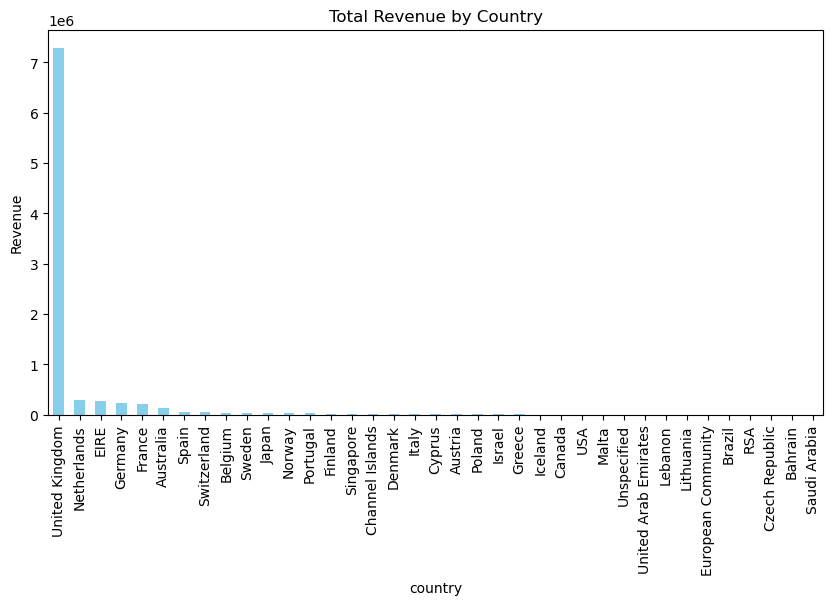

In [14]:
country_revenue.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), color='skyblue', title='Total Revenue by Country')
plt.xlabel('country')
plt.ylabel('Revenue')
plt.show()

# Insight:
United Kingdom has the highest revenue by far, followed by smaller contributions from other countries. This shows that most business comes from the UK, highlighting key customer regions.

## Monthly Revenue Trend Analysis

In [15]:
## Monthly Revenue Trend
### Analyze how revenue changes month by month to identify seasonal patterns or trends

# Create a Month-Year column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Check the first few rows
df[['InvoiceDate', 'Month', 'Revenue']].head()

## dt.to_period('M') converts dates to month granularity(e.g. 2010-12). This lets us group by month easily.

,InvoiceDate,Month,Revenue
0,2010-12-01 08:26:00,2010-12,15.30
1,2010-12-01 08:26:00,2010-12,20.34
2,2010-12-01 08:26:00,2010-12,22.00
3,2010-12-01 08:26:00,2010-12,20.34
4,2010-12-01 08:26:00,2010-12,20.34


In [16]:
# Group revenue by month
monthly_revenue = df.groupby('Month')['Revenue'].sum()

# See first few months
monthly_revenue.head()

Month
2010-12    570422.730
2011-01    568101.310
2011-02    446084.920
2011-03    594081.760
2011-04    468374.331
Freq: M, Name: Revenue, dtype: float64

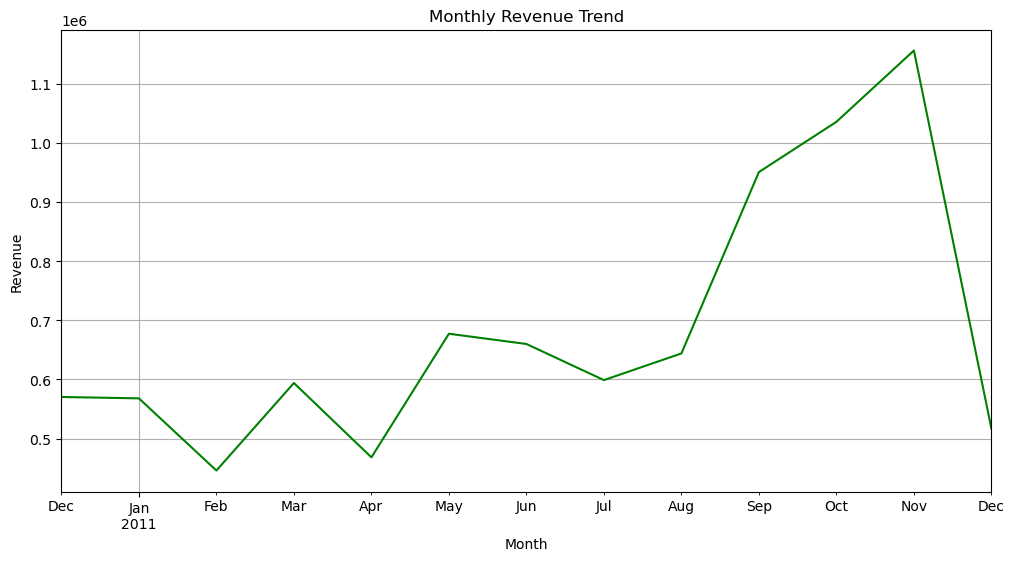

In [17]:
# Plot monthly revenue trend
monthly_revenue.plot(kind='line', figsize=(12,6), color='green', title='Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

# Insight:
Revenue peaks in Quarter 4, with November showing the highest sales, while February and April experiencing noticeable dips. This suggests strong seasonal demand toward year-end, indicating an opportunity to increase inventory and marketing spend ahead of peak months whiles using promotions to boost slower periods.

## Top Products by Revenue

In [18]:
product_revenue = df.groupby('Description')['Revenue'].sum()

In [19]:
product_revenue = product_revenue.sort_values(ascending=False)

In [20]:
product_revenue.head()

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
Name: Revenue, dtype: float64

In [21]:
top_10_products = product_revenue.head(10)
top_10_products

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: Revenue, dtype: float64

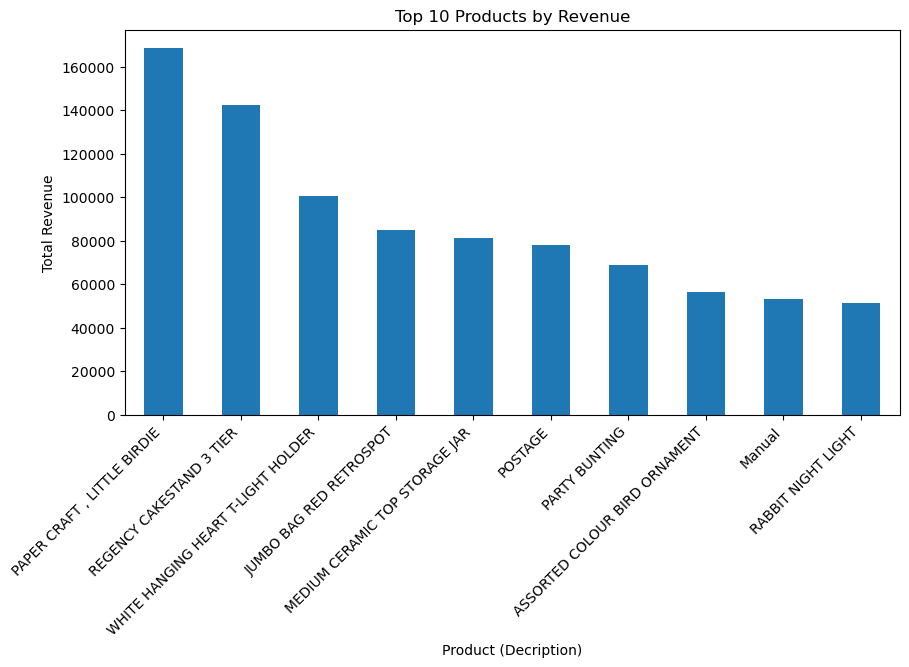

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
top_10_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product (Decription)')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.show()

# Insight:
The bar chart shows the top 10 products by total revenue. A small number of products generate the majority of sales, highlighting which products are driving business performance. These top-performing products should be prioritized for inventory planning and marketing, especially during high-demand months.

# Recommendations:
- Focus inventory on top-selling products to maximize revenue.
- Plan promotions or discounts for slower-selling products during low-demand months.
- Align marketing campaigns and stock levels with seasonal trends identified in the monthly revenue analysis.

## Conclusion
This analysis identifies seasonal trends in revenue and showed that a small number of products contribute most of the total sales. These insights can help businesses improve inventory planning, marketing focus, and revenue performance.